# Exploring Linear Regression

In this task, your will explore linear regression.


In [2]:
#import the things we need
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error
%matplotlib inline

## Create Synthetic Data.
This returns X training data and y labels.  

* Experiment with the **`noise`** keyword argument to see how it affects the graph below, after you are done experimenting, set `noise=20`.
* Experiment with the **`random_state`** variable to get different sets of data

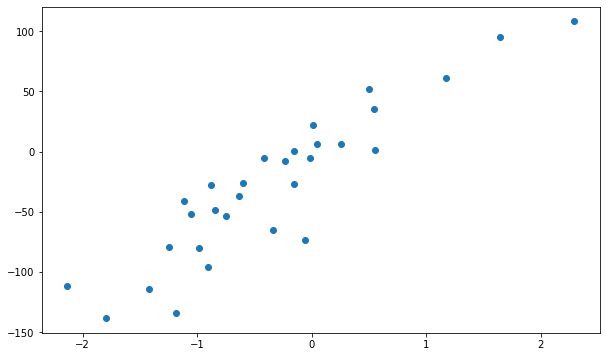

In [22]:
X, y = make_regression(n_samples=30, n_features=1, noise = 20.0, random_state = 2)
plt.figure(figsize=(10,6))
plt.scatter(X, y);

In [15]:
#create data to plot our prediction onto later - 
# this code is how we "plot a line !!" we need data to create the line
linspace_data = np.linspace(min(X),max(X),100)

In [35]:
# code to plot your guess
def plot_your_guess (m , c):
    line_data = m * linspace_data +c
    y_pred = m * X + c

    plt.figure(figsize=(10,6))
    plt.scatter(X,y)
    plt.plot(linspace_data, line_data, color = 'teal')
    plt.title("mean squared error: {0:.3g}".format(mean_squared_error(y_pred, y)));

# Let's plot your own personal guess for the best line

Fill out the `m` and `c` parameters for the above function and we'll plot it onto a graph, including checking its mean squared error.  We will later see how your eyes compare with the computers best guess

Feel free to use new code cells to create more plots


# TODO:
## I want to plot the cost function as well and show them how "where" we are on the cost function with each guess"


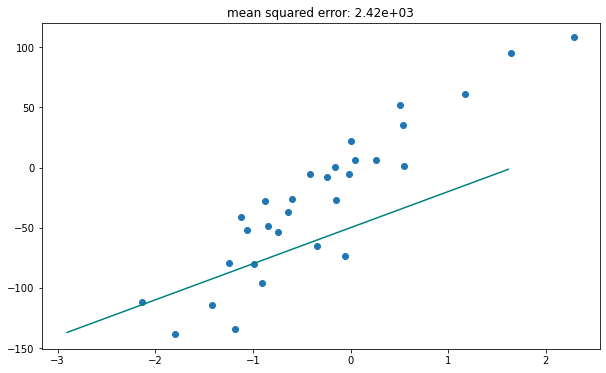

In [38]:
# You plug in m and c below
plot_your_guess(m = 30 , c = -50 )

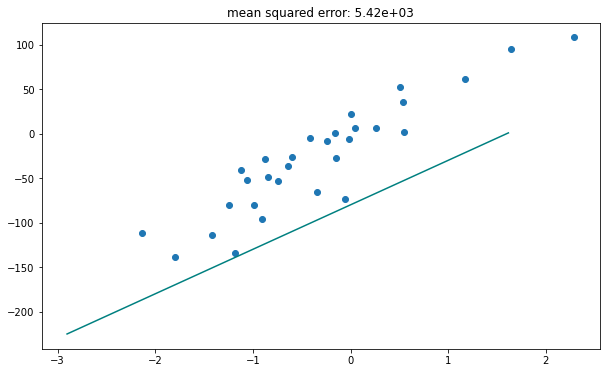

In [39]:
# make a few guesses, see if you can improve your mean squared error (small is better!)
plot_your_guess(m =50 , c = -80  )

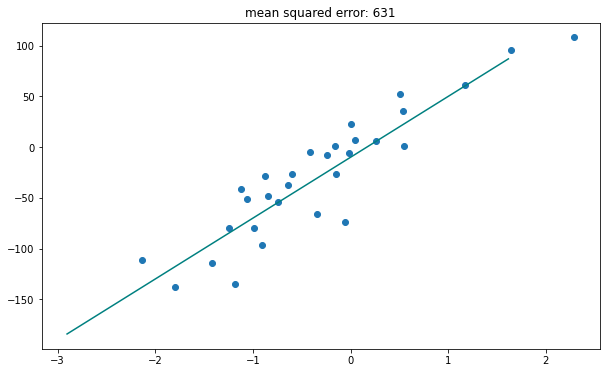

In [55]:
plot_your_guess(m = 60 , c = -10 )

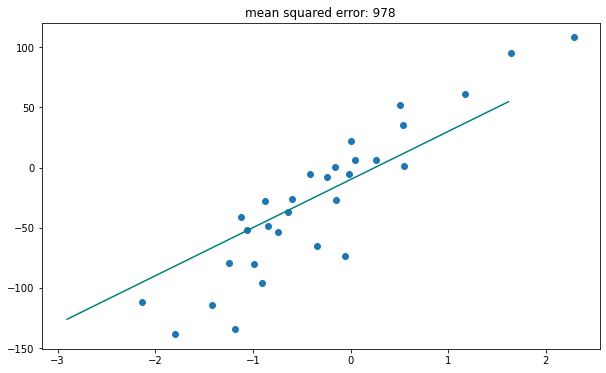

In [56]:
plot_your_guess(m = 40, c = -10  )

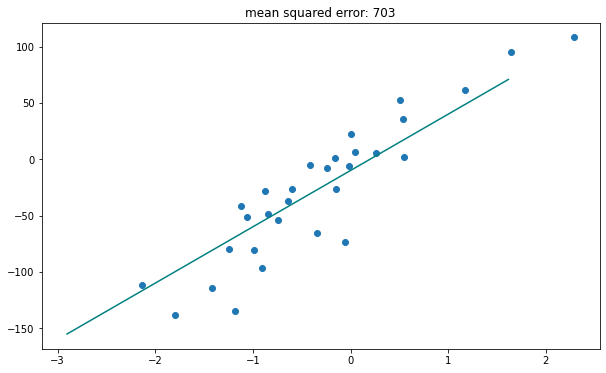

In [57]:
plot_your_guess(m = 50  , c = -10 )

# Linear Regression
Ok, now we'll let the computer "learn" for itself what the best line is.
We'll use the `LinearRegression` model from scikit-learn to do this.

LinearRegression will automatically find the coefficients and intercept terms that best fit the data point.  It will reduce the error as much as possible.

Let's create a linear regression model and fit it to our dataset.

In [58]:
from sklearn.linear_model import LinearRegression

def plot_linear():
    model = LinearRegression()
    model.fit(X,y)
    print ("M :  {}, C : {}".format(model.coef_, model.intercept_))
    y_line_data = model.predict(linspace_data.reshape(-1,1))

    plt.figure(figsize=(10,6))
    plt.scatter(X,y)
    plt.plot(linspace_data, y_line_data)
    plt.title("mean squared error: {0:.3g}".format(mean_squared_error(model.predict(X), y)))

M :  [59.15592131], C : -8.259243452985107


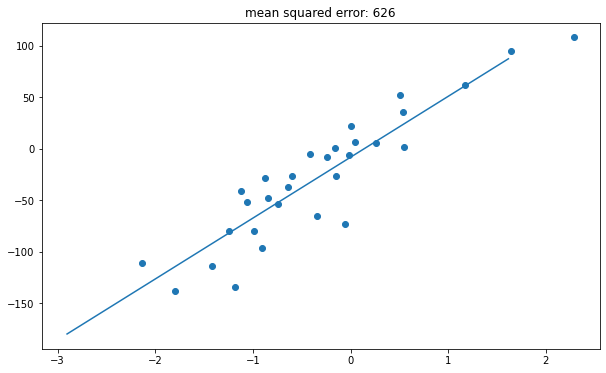

In [59]:
plot_linear()

##  How did your best eye guess compare to linear regression?

# Polynomial Regression

Now let's give our regression model more degrees of freedom.  Can we fit the data better?

How can you tell if the fit is better?

In [60]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

def plot_poly(degree = 3):
    # make a pipeline that creates the polynomial features based on our input data
    # this is akin to using performing polynomial regression
    # see http://scikit-learn.org/stable/modules/linear_model.html#polynomial-regression-extending-linear-models-with-basis-functions
    
    model = Pipeline([('poly', PolynomialFeatures(degree=degree)),
                       ('linear', LinearRegression(fit_intercept=False))])
    model.fit(X,y)
    y_line_data = model.predict(linspace_data)
    plt.figure(figsize=(10,6))
    plt.scatter(X,y)
    plt.plot(linspace_data.flatten().reshape(-1,1), y_line_data, color = 'teal')
    plt.title("mean squared error: {0:.3g}".format(mean_squared_error(model.predict(X), y)))
    plt.ylim((min(y)-10,max(y)+10))


### Try adjusting the degree of the polynomial regression.

What happens? 

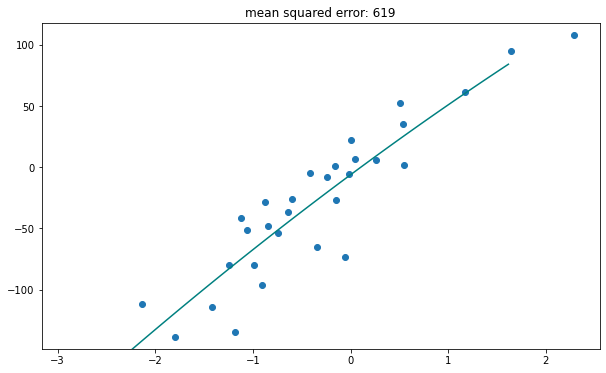

In [67]:
plot_poly(degree = 2)

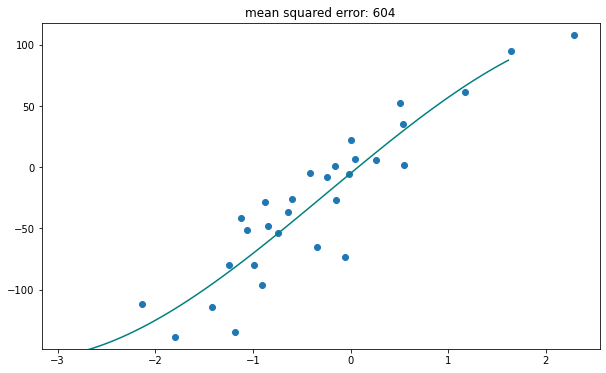

In [62]:
plot_poly(degree = 3)

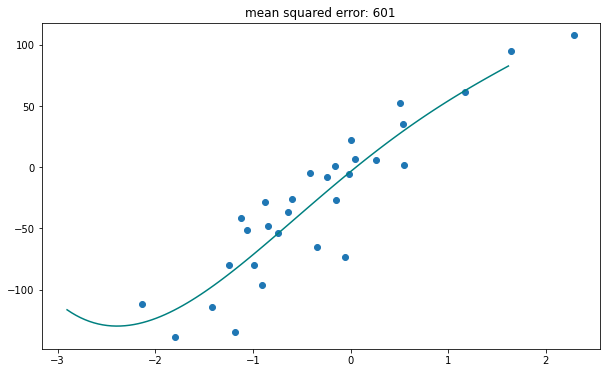

In [63]:
plot_poly(degree = 4)

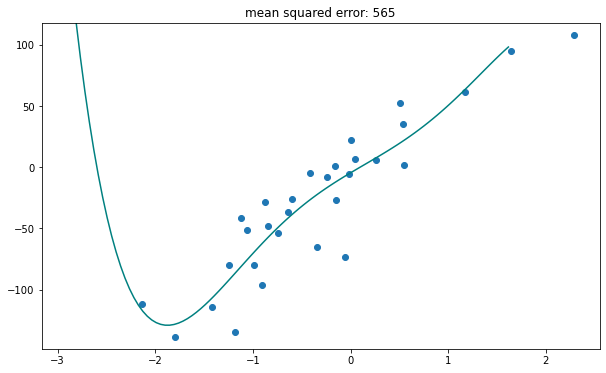

In [64]:
plot_poly(degree = 5)

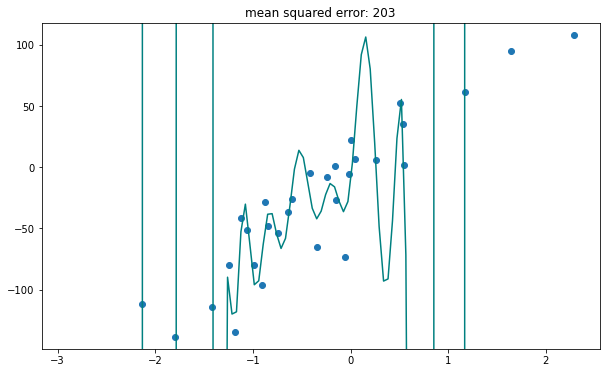

In [69]:
plot_poly(degree = 25)

## Imagine that your boss gave you these data-points as part of a housing dataset.

The task would be to find the function that best predicts new homes, that have never been sold before.

You can imagine that the x-axis is the size of the home, and the y-axis is the price of the home.  Just like I did in the class video.

Assuming this simple toy-world:
What degree of freedom would you choose for your final function?  Why?